## 1.  Problem Statement 
 
- This project understands effect of GRE, TOEFL, SOP, LOR, University Rating CGPA on chance of Admission
- Based on that Build SVR model
- Checking the performance

## 2. Data Collection 

- Data Source - https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv
- Data Consist of 500 rows and 9 columns

### 2.1 importing the required libraries

####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

####  loading the data

In [84]:
df = pd.read_csv('https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv')

####  show top 5 records

In [85]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


#### Shape of  the dataset

In [86]:
df.shape

(500, 9)

### 2.2 dataset information 

1. Serial No.
2. GRE Score
3. TOEFL Score
4. University Rating
5. SOP  -statement of purpose
6. LOR - letter of recommendation
7. CGPA
8. Research
9. Chance of admin
        

## 3. Data Checks to perform

1. Check the missing values
2. Check the duplicate values
3. Check data type
4. Check the number of unique values of each column
5. Check Statistics of dataset


### 3.1 Checking missing values

In [87]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

##### There are no missing values in dataset

### 3.2 Check the duplicate values

In [88]:
df.duplicated().sum()

0

##### There are no duplicate values in dataset

### 3.3 Check the data types

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


#### Observation

1. All the data is in numeric format.
2. All the features have 500 observations as non null. This gives a good confidance to the data for outlier handling.
3. To confirm, data can be cross check again for nulls, nans and outliers.

### 3.4 Checking the no. of unique values of each column

In [90]:
df.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

### 3.5 Check the statistics of dataset 

In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


#### observation

Observations from 5 point description of data :

- Since all the features are numeric in nature, simply using count, mean, std-dev, minimum, maximum, 25th percentile, 50th percentile (median) and 75th percentile will be enough to understand the data.

- GRE Score: Has observed mean score at 316 out of 340 with standard deviation of 11.30. For the same minimum score observed at 290/340 and maximum score at 340/340. And and range 25th to 75th percentile is [308 - 325].

- TOEFL Score: Has observed mean score at 107/120 with standard deviation of 6.08. For the same minimum score observed at 92/120 and maximum score at 120/120. And and range 25th to 75th percentile is [103 - 112].

- University Rating: Average rating of universities is 3.11 with a standard deviation 1.14. And since the ranting is in range of [1-5] inclusive the 5 points are distributed as minimum at 1, maximum at 5 and 25th and 75th percentile at 2 and 4 respectively. *

- SOP Statement of Purpose : Average rating of SOP is 3.37 with a standard deviation 0.99. And since the ranting is in range of [1-5] inclusive the 5 points are distributed as minimum at 1, maximum at 5 and 25th and 75th percentile at 2.50 and 4 respectively. *

- LOR Letter of Recommendation Strength : Average rating of LOR is 3.48 with a standard deviation 0.93. And since the ranting is in range of [1-5] inclusive the 5 points are distributed as minimum at 1, maximum at 5 and 25th and 75th percentile at 3 and 4 respectively. *

- CGPA : Average CGPA score is 8.58/10 with a standard deviation 0.60. For the same minimum score observed at 6.80/10 and maximum score at 9.92/10. And the range of 25th to 75th percentile is [8.13- 9.04].

- Research : This is a binary status feature with value 0 or 1. And to analyse this 5 point description is not very good tool and will be further anlysed in EDA as categorical variable. The only input we can take from this is mean is 0.56, suggesting 56% has opted in research.

- Chance of Admit : The mean value is observed at 0.72 with a standard deviation of 0.14. For the same minimum is observed at 0.34 and maximum is observed at 0.97. And the range of 25th and 75th percentile is [0.63-0.82].

Note - Since ratings are fixed range of [1-5] it will be treated as categorical feature for further Explorative analysis




## 4. Exploring the data

In [92]:
## define numerical and categorical column

numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

# print columns

print(" We have {} numerical features : {}".format(len(numeric_features), numeric_features))

 We have 9 numerical features : ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


#### as we can see that there are spaces between column names

In [93]:
[x for x in df.columns if x.endswith(' ') or x.startswith(' ')]

['LOR ', 'Chance of Admit ']

In [94]:
## removing the extra space

df.columns = df.columns.str.strip()

In [95]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [96]:
## dropping serial no from data

df = df.drop(['Serial No.'], axis=1)


In [97]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### 4.1 Univariate analysis

#### 4.1.1. GRE Score

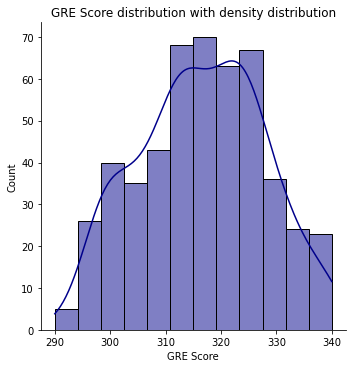

In [98]:
sns.displot(x=df['GRE Score'], kde = True, color='darkblue')
plt.title('GRE Score distribution with density distribution');

#### observation

- Score is distributed in range 290 to 340.
- Most of the applicant's scored between 310 and 330.
- As high as 70 applicants scored between 315 to 320.
- The distribution looks normal and can be further confirmed by QQ- plot

#### 4.1.2. TOEFL Score

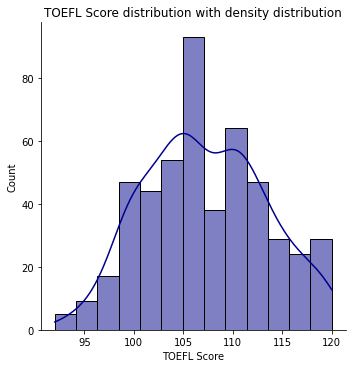

In [99]:
sns.displot(x=df['TOEFL Score'], kde = True, color='darkblue')
plt.title('TOEFL Score distribution with density distribution');

#### observation

- TOEFL Scores are distributed in the range 90 to 120.
- As high as 80 to 85 applicants have scored between 105 and 107.
- Good number of student have scored between 100 and 112
- Distribution seems to be normal and can be confimed by QQ - plot

#### 4.1.3. University rating

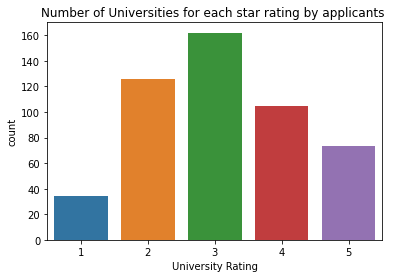

In [100]:
sns.countplot(x=df['University Rating']);
plt.title('Number of Universities for each star rating by applicants ');

#### observation

- Close to 160 applicants have marked their universities as 3 Stars.
- 3 stars followed by 2 stars for universities.
- 1 is given by only 30 to 35 applicants  which is lowest.

#### 4.1.4. SOP - Statement of purpose

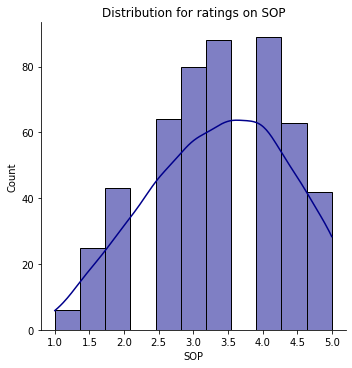

In [101]:
sns.displot(x=df['SOP'], kde = True, color='darkblue');
plt.title('Distribution for ratings on SOP');

#### Observation

- Most of the applicants have received 3.5 to 4.0 stars in their SOP.
- Based on the plot, rating distribution can be bucketed in 3 sections 1.0 to 2.1  as low ratings, 2.5 to 3.6 as mid level ratings and 3.9 to 5.0 as high level of ratings.
- Each section described in the above point can further be divided into low,mid and high. This provides a really well quantified information on strength of statement of purpose.


#### 4.1.5. LOR - Letter of recommendation 

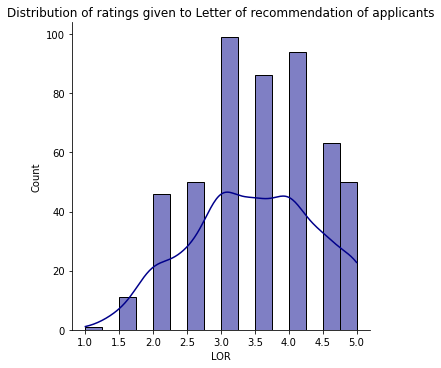

In [102]:
sns.displot(x=df['LOR'], kde = True, color='darkblue');
plt.title('Distribution of ratings given to Letter of recommendation of applicants');

#### observation

- Most of the applicants have recommendation rating of 3.0.
- A very good number of applicants are having LOR rating between 3 to 4.

#### 4.1.6. CGPA

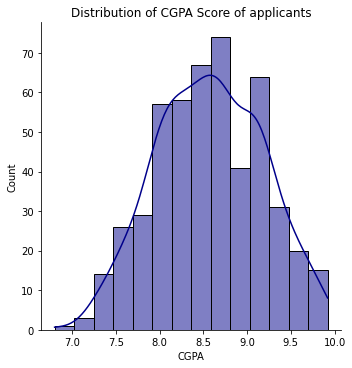

In [103]:
sns.displot(x=df['CGPA'], kde = True, color='darkblue');
plt.title('Distribution of CGPA Score of applicants');

#### observation

- CGPA Score are distributed in range 6.9 to 9.7 inclusive.
- More than 70 applicants have a CGPA between 7.90 to 9.25.
- Saturation can be observed as a  great number of  applicants  have a CGPA between 7.90 to 9.25.

#### 4.1.7 . Research

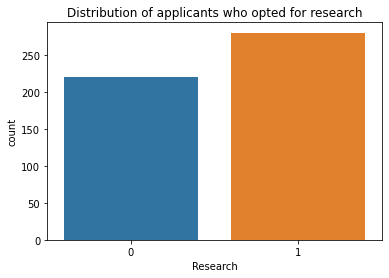

In [104]:
sns.countplot(x=df['Research']);
plt.title('Distribution of applicants who opted for research');

#### observation

- Out of 500 applicants approx 280 applicants have opted for reasearch.
- In percentage 56% applicants are chosing for research.

#### 4.1.8. Chance of Admit

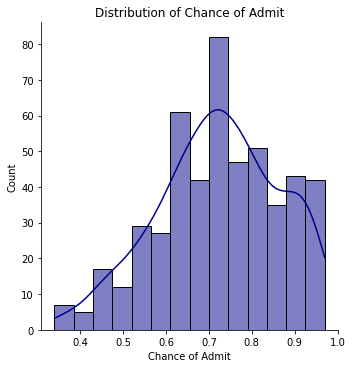

In [105]:
sns.displot(x=df['Chance of Admit'], kde= True, color='darkblue');
plt.title('Distribution of Chance of Admit');

#### observation

- Chances are distributed between 0.34 to 0.97 inclusive.
- Highest number of applicants have chance of admit at 0.72.
- Most of students have chance of admit above 0.61.


### 4.2  Bivariate Analysis

#### 4.2.1. Comparision of GRE Score with Chance of Admit and Research

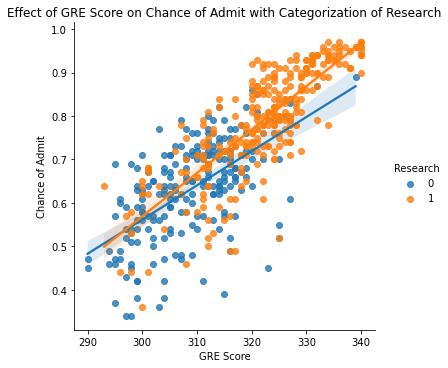

In [106]:
sns.lmplot(y='Chance of Admit', x='GRE Score', hue='Research', data=df);
plt.title('Effect of GRE Score on Chance of Admit with Categorization of Research');

#### observation

- As the GRE Score increases so does the Chance of Admit.
- Applicants who opts for Research tends to have higher GRE score and the Chance od Admit

#### 4.2.2. Comaprision of TOEFL Score with Chance of Admit and Research

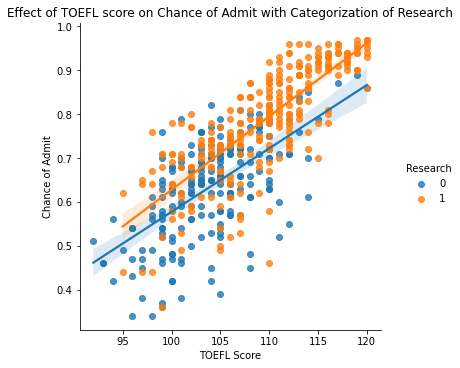

In [107]:
sns.lmplot(y='Chance of Admit', x='TOEFL Score', hue='Research', data=df);
plt.title('Effect of TOEFL score on Chance of Admit with Categorization of Research');

#### observation

- As the TOEFL Score increases so does the Chance of Admit
- Applicants who have opted for Research tend to have higher chance of admit.

#### 4.2.3. Comparision of University Rating with Chance of admit and Research

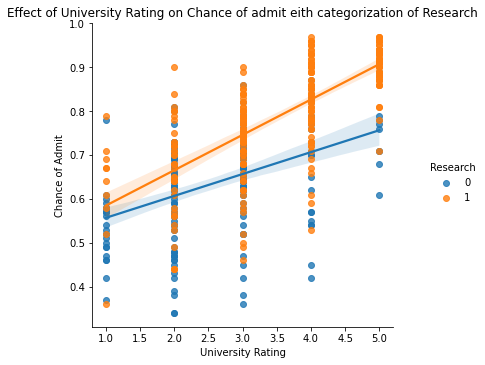

In [108]:
sns.lmplot(y='Chance of Admit', x='University Rating', hue='Research', data=df);
plt.title('Effect of University Rating on Chance of admit eith categorization of Research');

#### Observation

- As the University Rating increases so does the Chance of admit.
- Universities with higher rating have more research opted applicants.

#### 4.2.4. Comparision of SOP(Statement of Purpose) with Chance of admit and Research

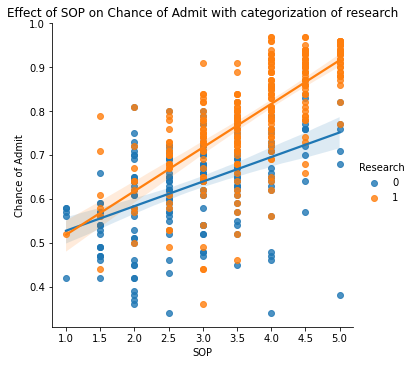

In [109]:
sns.lmplot(y='Chance of Admit', x='SOP', hue='Research', data=df);
plt.title('Effect of SOP on Chance of Admit with categorization of research');

#### observation

- Srength of Statement of Purpose has a great impact on chance of admit.
- Applicants with High score on SOP and opted for research have almost sure shot at chance of admit.

#### 4.2.5. Comparision of Letter of Recommendations (LOR) with Chance of Admit and Research

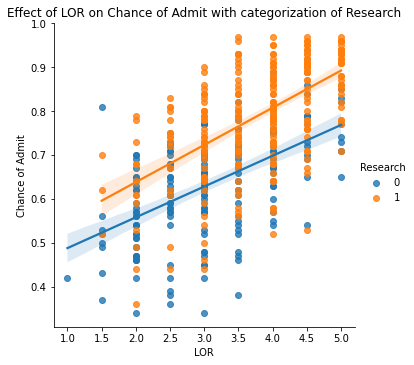

In [110]:
sns.lmplot(y='Chance of Admit', x='LOR', hue='Research', data=df);
plt.title('Effect of LOR on Chance of Admit with categorization of Research');

#### observation

- As the score of LOR improves, the Chance of Admit also improves with it.
- From the graph if the applicant has opted to research than chances of admit is higher.

#### 4.2.6. Comparision of CGPA with Chance of Admit and Research

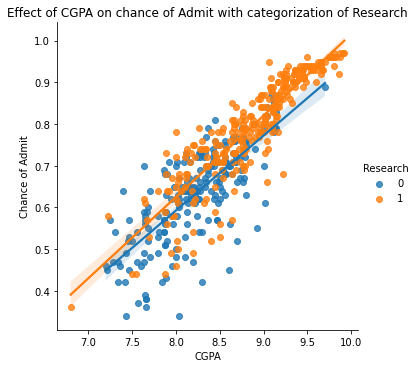

In [111]:
sns.lmplot(y='Chance of Admit', x='CGPA', hue='Research', data=df);
plt.title('Effect of CGPA on chance of Admit with categorization of Research');

#### observation

- As the CGPA increases the chance of Admit increases tremendously.
- Option of research with CGPA do not seems to have much of the impact compare to other features.

### 4.3 Multivariate Analsyis

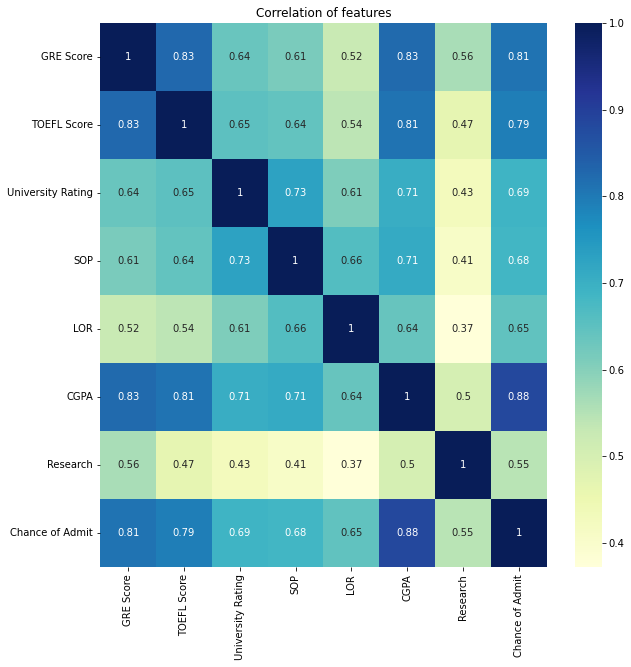

In [112]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True,cmap='YlGnBu');
plt.title('Correlation of features');

#### observation

- CGPA Score has most impact on Chance of Admit. It is followed by GRE and TOEFL Score.
- Research option has the list impact on the chance of Admit
- University rating, SOP and LOR are also having impact on the chance of Admit.

## 5. splitting data into independent and dependent features

In [113]:
X = df.drop('Chance of Admit', axis=1)

In [114]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [115]:
y = df['Chance of Admit']

In [116]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

In [117]:
### splitting data into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [118]:
X_test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
151,332,116,5,5.0,5.0,9.28,1
424,325,114,5,4.0,5.0,9.46,1
154,326,108,3,3.0,3.5,8.89,0
190,324,111,5,4.5,4.0,9.16,1
131,303,105,5,5.0,4.5,8.65,0


In [119]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
324,315,104,3,3.0,2.5,8.33,0
252,318,100,2,2.5,3.5,8.54,1
441,332,112,1,1.5,3.0,8.66,1
427,310,101,3,3.5,5.0,8.65,1
70,332,118,5,5.0,5.0,9.64,1


In [120]:
y_test.head()

151    0.94
424    0.91
154    0.80
190    0.90
131    0.77
Name: Chance of Admit, dtype: float64

In [121]:
y_train.head()

324    0.67
252    0.71
441    0.79
427    0.71
70     0.94
Name: Chance of Admit, dtype: float64

In [122]:
# both have equal shape

X_train.shape, y_train.shape

((375, 7), (375,))

## 6. Transforming data

In [123]:
from sklearn.preprocessing import StandardScaler

In [124]:
scaler = StandardScaler()

In [125]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.10006876, -0.50453716, -0.0560763 , ..., -1.00222248,
        -0.36783128, -1.13427746],
       [ 0.16173904, -1.16205736, -0.93226844, ...,  0.07005549,
        -0.0297116 ,  0.8816185 ],
       [ 1.38350874,  0.81050323, -1.80846058, ..., -0.46608349,
         0.16349965,  0.8816185 ],
       ...,
       [ 0.07446977, -0.17577707, -0.0560763 , ..., -0.46608349,
        -1.07627251,  0.8816185 ],
       [-1.40910772, -1.16205736, -0.0560763 , ..., -0.46608349,
         0.16349965,  0.8816185 ],
       [-0.27460729, -0.83329726, -0.0560763 , ..., -1.00222248,
         0.19570152, -1.13427746]])

In [126]:
X_test = scaler.transform(X_test)
X_test

array([[ 1.38350874,  1.46802342,  1.69630798,  1.66146257,  1.67847246,
         1.16175776,  0.8816185 ],
       [ 0.77262389,  1.13926332,  1.69630798,  0.66378689,  1.67847246,
         1.45157463,  0.8816185 ],
       [ 0.85989315,  0.15298303, -0.0560763 , -0.3338888 ,  0.07005549,
         0.53382121, -1.13427746],
       [ 0.68535462,  0.64612318,  1.69630798,  1.16262473,  0.60619448,
         0.96854651,  0.8816185 ],
       [-1.14729993, -0.34015711,  1.69630798,  1.66146257,  1.14233347,
         0.14739871, -1.13427746],
       [ 0.33627757, -0.50453716, -0.0560763 , -0.3338888 ,  0.07005549,
         0.29230715,  0.8816185 ],
       [-0.36187655, -0.34015711, -0.93226844, -1.33156448, -1.00222248,
        -0.17462003, -1.13427746],
       [ 1.38350874,  0.15298303,  1.69630798,  1.16262473,  0.60619448,
         0.74313339,  0.8816185 ],
       [-0.62368434, -0.50453716, -0.93226844, -1.33156448, -1.00222248,
        -0.48053784, -1.13427746],
       [-0.36187655, -0.1757

## 7. Building Model

In [128]:
from sklearn.svm import SVR
model = SVR()

In [130]:
model.fit(X_train,y_train)

SVR()

In [131]:
svr_pred= model.predict(X_test)
svr_pred

array([0.86448478, 0.86417389, 0.64993814, 0.85127578, 0.70546036,
       0.7574019 , 0.64562856, 0.8374946 , 0.60540491, 0.7499413 ,
       0.87245167, 0.80905978, 0.8501926 , 0.67828992, 0.79563367,
       0.73813638, 0.70599962, 0.74942901, 0.74397623, 0.62461368,
       0.74524207, 0.62023823, 0.59939887, 0.86498548, 0.47403454,
       0.86577212, 0.73739421, 0.5349166 , 0.66114659, 0.6681512 ,
       0.88063063, 0.75792351, 0.59757618, 0.659533  , 0.72195655,
       0.86222102, 0.81603033, 0.66700444, 0.66986721, 0.70308992,
       0.86541166, 0.59529725, 0.69816638, 0.87297663, 0.85464852,
       0.50589332, 0.56266899, 0.65426092, 0.77984391, 0.72964663,
       0.79144637, 0.68053493, 0.54289505, 0.60234504, 0.65093636,
       0.79311027, 0.83658814, 0.61545878, 0.68815676, 0.86796428,
       0.61411511, 0.82414663, 0.73731365, 0.50901921, 0.83202811,
       0.5044696 , 0.70643466, 0.71803499, 0.52797734, 0.69684074,
       0.89743609, 0.55063192, 0.57081914, 0.73056104, 0.69386

In [132]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, r2_score
svr_r2_score = r2_score(y_test,svr_pred)
print("SVR Model has {} % accuracy".format(round(svr_r2_score*100, 4)))

SVR Model has 75.7005 % accuracy


In [133]:
adjusted_r2_score = 1 - ((1-svr_r2_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

print("Adjusted R square accuracy is {} %".format(round(adjusted_r2_score*100, 4)))

Adjusted R square accuracy is 74.2467 %
